## Assignment details

Students are required to select at least two mental health data sources, and generate three distinct visualisations. Each visualisation must serve a progressive narrative purpose:

- Plot 1: the Macro plot that established the landscape of our topic of interest. This should establish why this is an interesting and important topic to work on. For example, this visualisation can show who is affected by a certain condition.
- Plot 2: the Micro (deep dive) plot that reveals a certain nuance in the data. For example, this would illustrate why or how something is happening.
- Plot 3: the Actionable plot defines a clear target for intervention. It should motivate and communicate where and how a resource can be deployed effectively. For example, it can show in what neighbourhood your intervention should be deployed.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Dataset 1

In [36]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Set the path to the file you'd like to load
file_path = "Mental Health Dataset.csv"

# Load the latest version, specifying latin-1 encoding and the 'python' engine for parsing
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bhavikjikadara/mental-health-dataset",
  file_path,
  pandas_kwargs={'encoding': 'latin-1', 'engine': 'python'}
)

df.head()

/tmp/ipython-input-1021575045.py:9: DeprecationWarning:

Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.



Using Colab cache for faster access to the 'mental-health-dataset' dataset.
         Timestamp  Gender        Country Occupation self_employed  \
0  8/27/2014 11:29  Female  United States  Corporate           NaN   
1  8/27/2014 11:31  Female  United States  Corporate           NaN   
2  8/27/2014 11:32  Female  United States  Corporate           NaN   
3  8/27/2014 11:37  Female  United States  Corporate            No   
4  8/27/2014 11:43  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_Health_History Mood_Swings Coping_Struggles Work_Intere

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [38]:
import plotly.express as px

# Filter for individuals with a mental health history
df_mental_health_history = df[df['Mental_Health_History'] == 'Yes']

# Count the number of individuals with mental health history per country
country_counts = df_mental_health_history['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count_Mental_Health_History']

# Create the choropleth map
fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Count_Mental_Health_History",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Countries with Reported Mental Health History (Global View)'
)
fig.show()

### Dataset 2

In [2]:
# Read in dataset 2
df = pd.read_csv("mental_health.csv")
df.head()

,Age,Gender,Country,Education,Marital_Status,Income_Level,Employment_Status,Work_Hours_Per_Week,Remote_Work,Job_Satisfaction,...,Ever_Sought_Treatment,On_Therapy_Now,On_Medication,Trauma_History,Social_Support,Close_Friends_Count,Feel_Understood,Loneliness,Discuss_Mental_Health,Has_Mental_Health_Issue
0,40,Male,USA,Some College,Single,Middle,Full-time,27,No,6,...,1,0,0,0,9,3,4,6,Sometimes,1
1,33,Male,India,Bachelor,Married,Middle,Unemployed,47,No,6,...,0,0,0,0,3,2,7,7,Sometimes,1
2,42,Male,Other,High School,Single,Low,Full-time,53,No,1,...,1,0,0,1,5,3,6,9,Sometimes,1
3,53,Male,Germany,Bachelor,Single,Middle,Unemployed,42,No,10,...,0,1,0,0,1,3,10,5,Never,1
4,32,Female,India,Bachelor,Single,High,Student,13,No,4,...,0,0,0,0,1,5,1,6,Sometimes,1


In [3]:
# Examine dataset
df.info()
# Dataset has no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Gender                         10000 non-null  object 
 2   Country                        10000 non-null  object 
 3   Education                      10000 non-null  object 
 4   Marital_Status                 10000 non-null  object 
 5   Income_Level                   10000 non-null  object 
 6   Employment_Status              10000 non-null  object 
 7   Work_Hours_Per_Week            10000 non-null  int64  
 8   Remote_Work                    10000 non-null  object 
 9   Job_Satisfaction               10000 non-null  int64  
 10  Work_Stress_Level              10000 non-null  int64  
 11  Work_Life_Balance              10000 non-null  int64  
 12  Ever_Bullied_At_Work           10000 non-null  

This dataset contains 10,000 records with 50 features and a binary target label indicating the presence of a mental health issue. The features of the dataset are split into the following 6 categories:
1. **Demographics** (Age, Gender, Country, Education level, Marital status, Income level)

2.	**Work / Academic Factors** (Employment status, Work hours per week, Remote work status, Job satisfaction, Work stress level, Work-life balance, Workplace bullying, Employer mental health support)

3.	**Lifestyle & Habits** (Exercise frequency, Sleep duration, Caffeine intake, Alcohol consumption, Smoking habits, Screen time, Social media usage, Hobby time, Diet quality, Financial stress)

4.	**Symptoms & Emotional State** (Low mood, Loss of interest, Sleep problems, Fatigue, Appetite changes, Low self-esteem, Difficulty concentrating, Anxiety, Panic attacks, Mood swings, Irritability, Obsessive thoughts, Compulsive behavior, Self-harm, Suicidal thoughts)

5.	**History & Background** (Family history of mental illness, Prior diagnosis, Therapy, Medication usage, Trauma history)

6.	**Social Support** (Perceived social support, Number of close friends, Feeling understood, Loneliness, Comfort discussing mental health)


In [3]:
# Examine the distribution of labels
print(df['Has_Mental_Health_Issue'].value_counts())

Has_Mental_Health_Issue
1    9216
0     784
Name: count, dtype: int64


### Plot 2

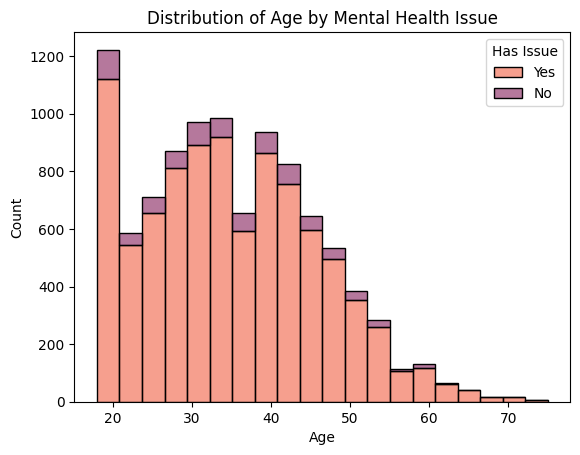

In [11]:
# Plot 2: Stacked histogram of mental health issue across age
sns.histplot(data=df, x='Age', hue='Has_Mental_Health_Issue', bins=20, palette='rocket', alpha=0.6, multiple='stack')
plt.title(f'Distribution of Age by Mental Health Issue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Has Issue', labels=['Yes', 'No'], loc='upper right')
plt.show()

### Plot 3

/tmp/ipython-input-439242350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = df['Age'].apply(lambda x: '<= 20' if x <= 20 else '> 20')


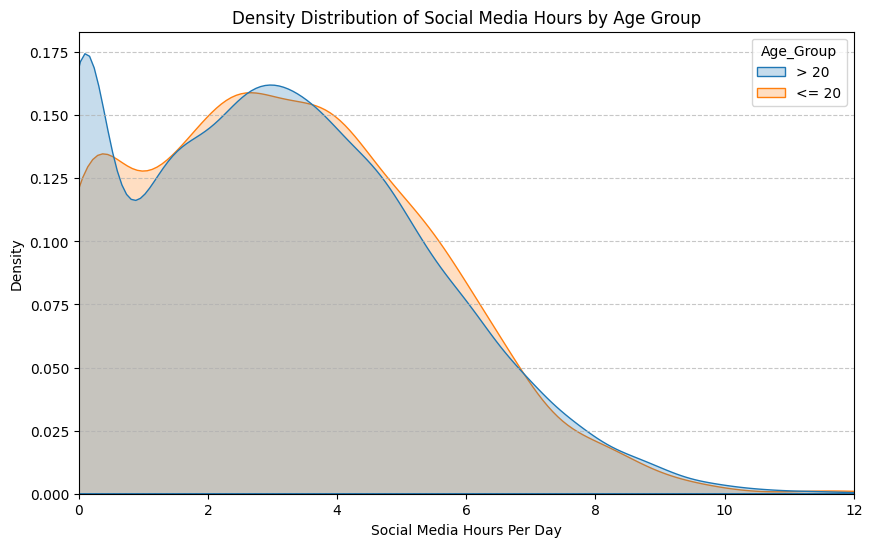

In [12]:
# Filter for those with mental health issues only
df = df[df['Has_Mental_Health_Issue'] == 1]

# Create a new column to categorize age into two groups
df['Age_Group'] = df['Age'].apply(lambda x: '<= 20' if x <= 20 else '> 20')

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Social_Media_Hours_Day', hue='Age_Group', fill=True, common_norm=False)
plt.title('Density Distribution of Social Media Hours by Age Group')
plt.xlabel('Social Media Hours Per Day')
plt.ylabel('Density')
plt.xlim(left=0, right=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

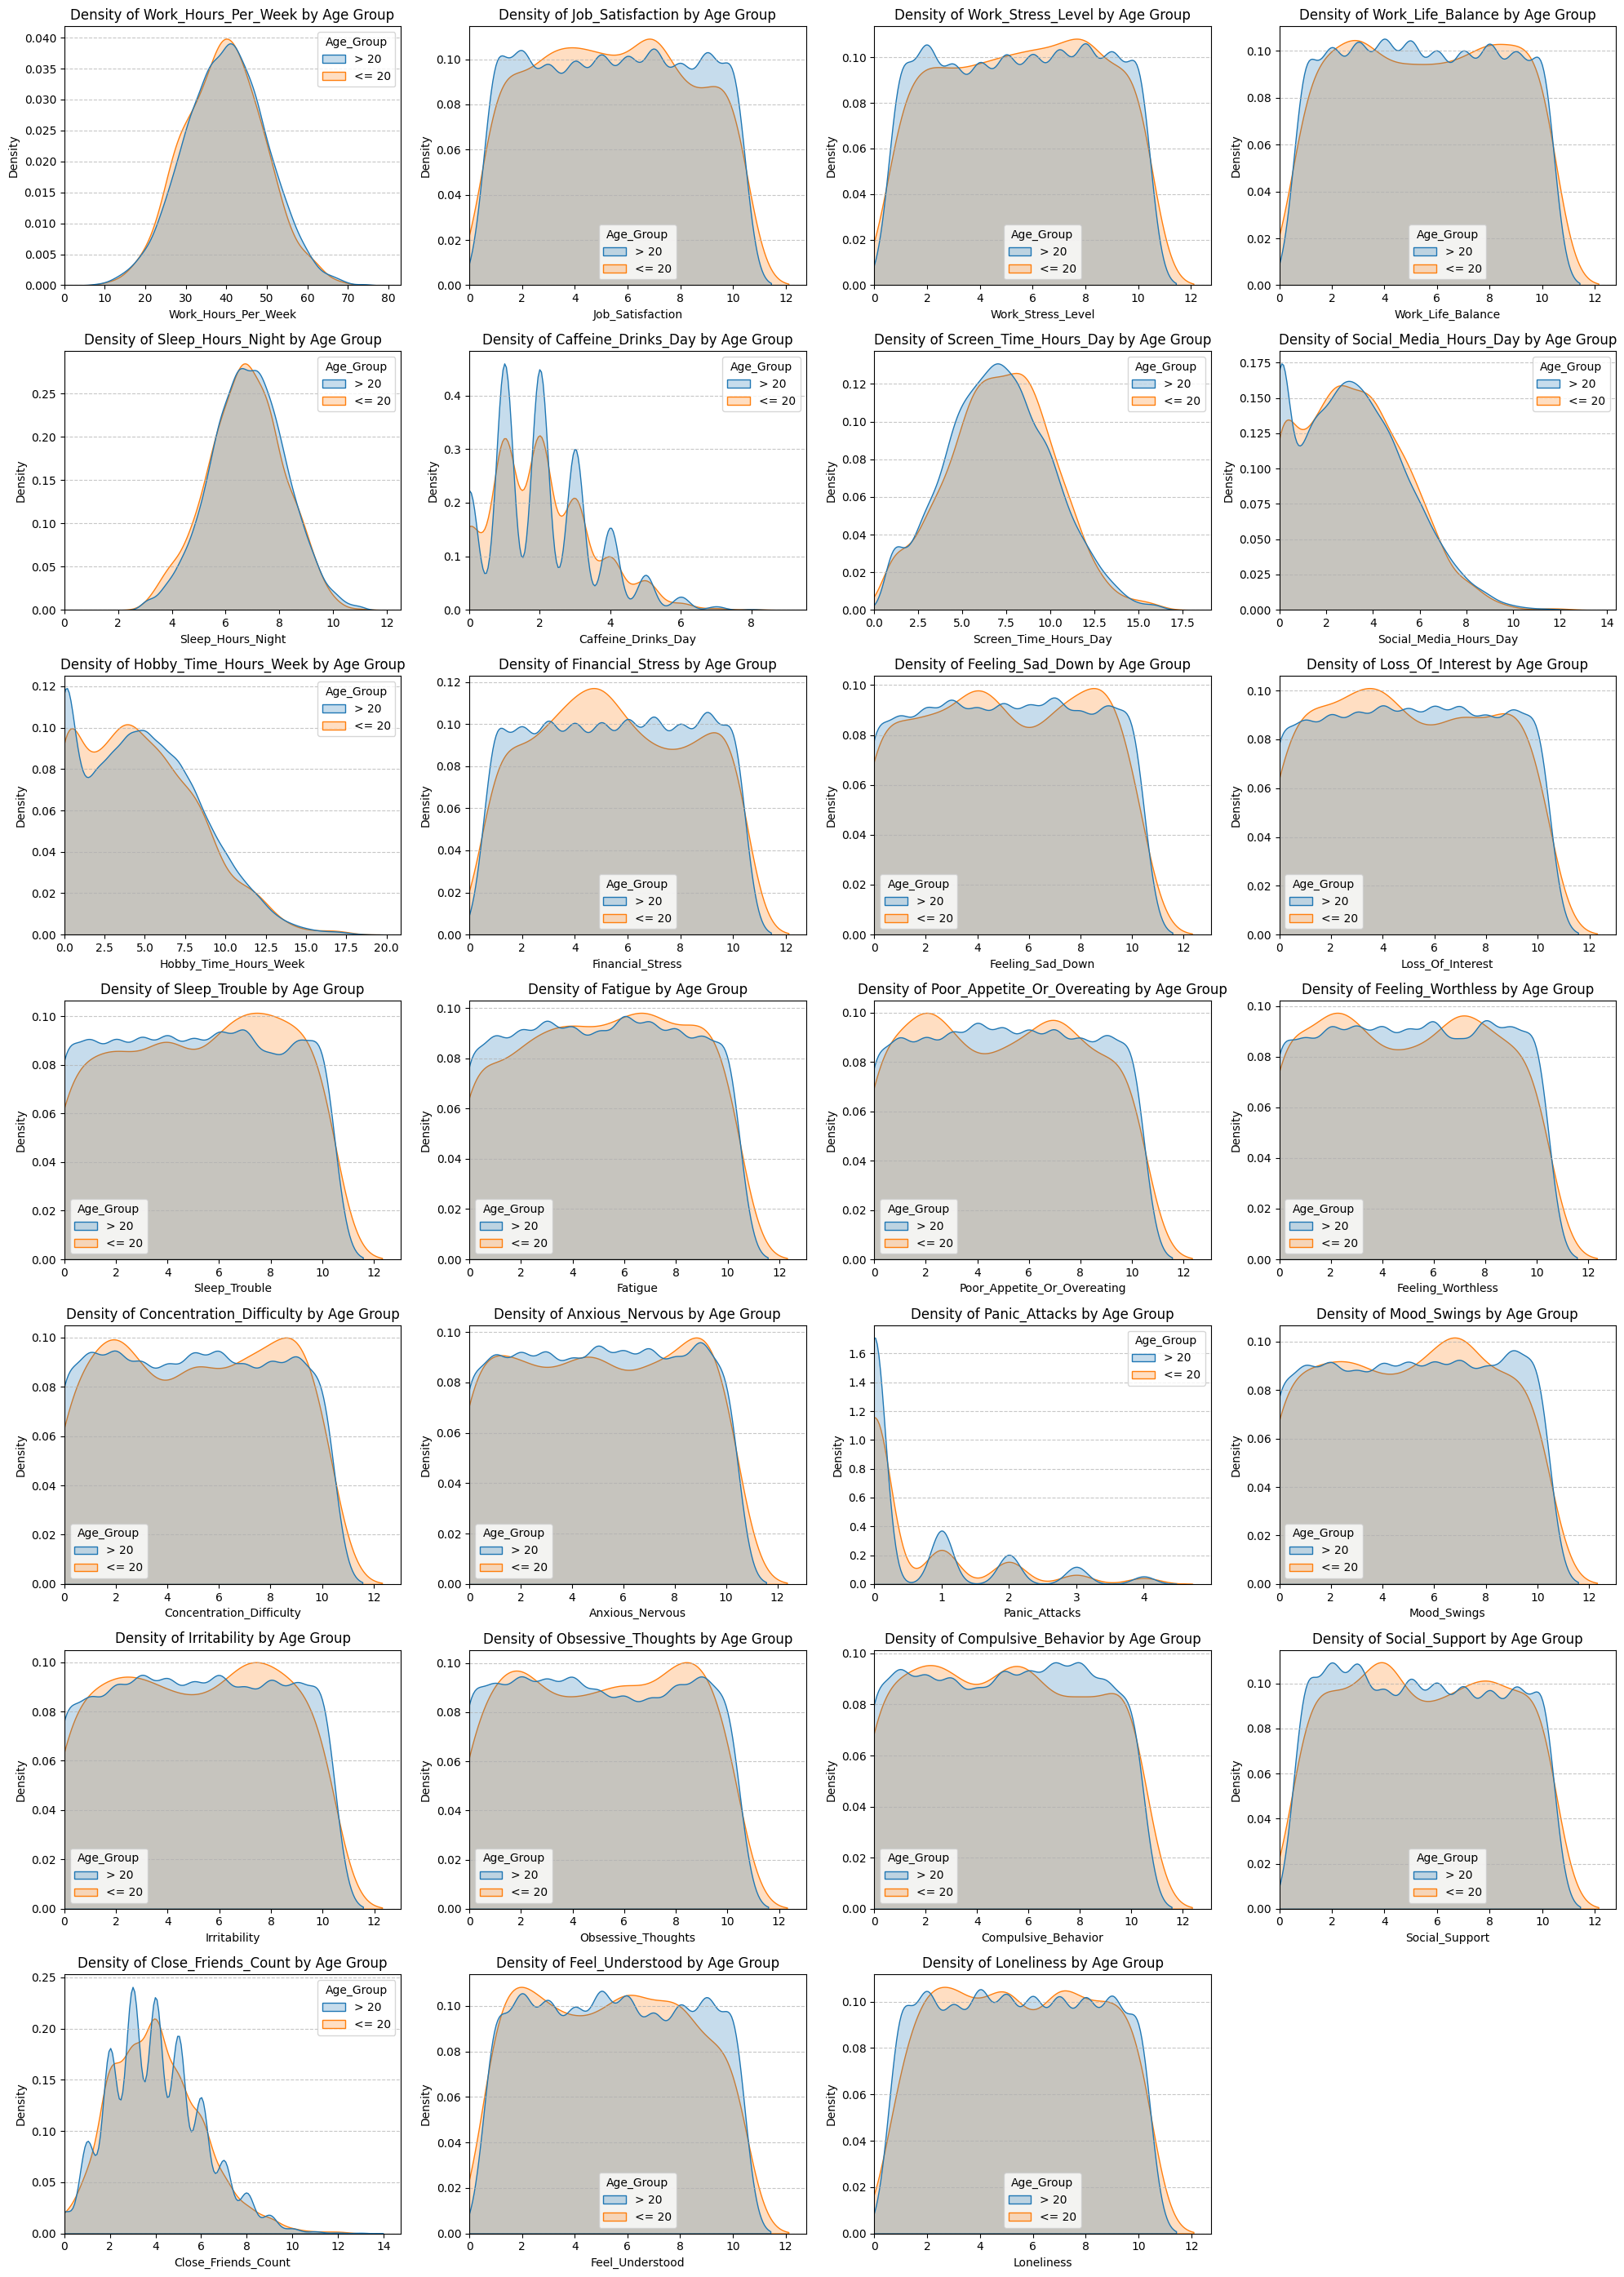

In [14]:
'''
# Filter for those with mental health issues only
df = df[df['Has_Mental_Health_Issue'] == 1]

# Create a new column to categorize age into two groups
df['Age_Group'] = df['Age'].apply(lambda x: '<= 20' if x <= 20 else '> 20')

# Identify numerical columns (int64 and float64)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude 'Age' (used for grouping) and 'Has_Mental_Health_Issue' (target variable)
excluded_cols = ['Age', 'Has_Mental_Health_Issue']
numerical_features = [col for col in numerical_features if col not in excluded_cols]

# Further filter out binary columns (those with only 2 unique values)
final_numerical_features = []
for col in numerical_features:
    if df[col].nunique() > 2:
        final_numerical_features.append(col)


num_plots = len(final_numerical_features)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))

for i, col in enumerate(final_numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)

    sns.kdeplot(data=df, x=col, hue='Age_Group', fill=True, common_norm=False)
    plt.title(f'Density of {col} by Age Group')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.xlim(left=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
'''